# Regression Models

## Goals

In this Assignmnet :

 - You Will impliment the regression models

## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas,  a Python library for data analysis

### Import Libraries

![Libraries](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Libraries.png?raw=true)


In [1]:
#Your code Here
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

###  Fetch Data From CSV Files

![Load Data](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Load%20N%20show.png?raw=true)

In [2]:
#Your code Here
#Read the trainig and testing data from the file

trainData = pd.read_csv('trainRegression.csv')
testData = pd.read_csv('testRegression.csv')

### Show Data

In [3]:
#Your code Here
#Show the first 5 rows of the training data
trD = trainData.head(5)
print(trD)
print(trD.shape)


      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802
(5, 2)


##### Expected Output


![Output 1](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O1.png?raw=true)


### Type Casting of Data

![TypeCasting](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Type%20Casting.png?raw=true)


In [4]:
#Your code Here
#TypeCast the data into numpy array
x_train = np.array(trainData['X'])
y_train = np.array(trainData['R'])
x_test = np.array(testData['X'])
y_test = np.array(testData['R'])



### Plot Data

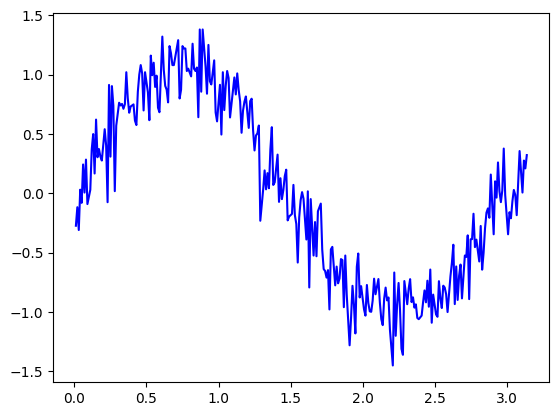

In [5]:
#Your code Here
#Plot your Training Data using matplotlib
graph = plt.plot(x_train,y_train, color='blue')
print(graph)


##### Expected Output


![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O2.png?raw=true)


 ### Fit Linear Regression Model (Training data)

 As our linear Model was
 
![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

And using derivatives we transformed our model into 2 simultaneous equations

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [6]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 
m = len(x_train) # for calculating total number of rows in training data
xi = sum(x_train) # for calculating the sum of all x_train values
xi2 = x_train.dot(x_train) # for calculating the xi square sums


linearA = np.array([[m,xi],
     [xi,xi2]])

yi = sum(y_train) # for calculating sum of all y_train values
xiyi = x_train.dot(y_train) # for calculating the sum of product of x_train and y_train

linearB = np.array([[yi],
     [xiyi]])

print(f"Matrix A : \n {linearA}")
print(f"Matrix B : \n {linearB}")




Matrix A : 
 [[283.     444.95  ]
 [444.95   932.7465]]
Matrix B : 
 [[   1.39087  ]
 [-126.6414295]]


Expected output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Linear.png?raw=true)


#### Compute Valus of Both Θ`s


In [7]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node and 0_1
linearX = np.linalg.inv(linearA).dot(linearB) #X = A^-1 * B
print(f"Matrix X for the linear model : \n {linearX}")



Matrix X for the linear model : 
 [[ 0.8736061 ]
 [-0.55251074]]


Expected Output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20LinearT.png?raw=true)


### Run Predictions (Testing data)

In [8]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

xRowsTestLinear = x_test.reshape((len(x_test),1)) # interchanging rows to coloum and vice versa, the x_test for posible multiplication
predictedYlinear = linearX[0,0] + (linearX[1,0]*xRowsTestLinear)
print(f"Predicted Y \n {predictedYlinear}")

Predicted Y 
 [[ 0.8736061 ]
 [ 0.81835502]
 [ 0.76310395]
 [ 0.70785287]
 [ 0.6526018 ]
 [ 0.59735072]
 [ 0.54209965]
 [ 0.48684858]
 [ 0.4315975 ]
 [ 0.37634643]
 [ 0.32109535]
 [ 0.26584428]
 [ 0.2105932 ]
 [ 0.15534213]
 [ 0.10009106]
 [ 0.04483998]
 [-0.01041109]
 [-0.06566217]
 [-0.12091324]
 [-0.17616432]
 [-0.23141539]
 [-0.28666646]
 [-0.34191754]
 [-0.39716861]
 [-0.45241969]
 [-0.50767076]
 [-0.56292184]
 [-0.61817291]
 [-0.67342398]
 [-0.72867506]
 [-0.78392613]
 [-0.83917721]]


### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

In [9]:
#Your code Here
#Using cost function calculate the cost of the model
YRowsTestLinear = y_test.reshape((len(y_test),1)) # converting y_test into 2D array,interchanging coloumns into rows, for possible subtraction from predictedY
linearMSE = (sum((predictedYlinear-YRowsTestLinear)**2)/(len(x_test))) # as two 2D arrays are being subtracted,s then squared, and then we take sum, we get 1d array having 1 element at 0th index
print(f"Mean Square Error for LINEAR MODEL is :: {float(linearMSE[0])}") 


Mean Square Error for LINEAR MODEL is :: 0.31593217204597746


Expected Output

![MSE of Linear](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Linear.png?raw=true
)

### Plot Data (Train and Test Data)

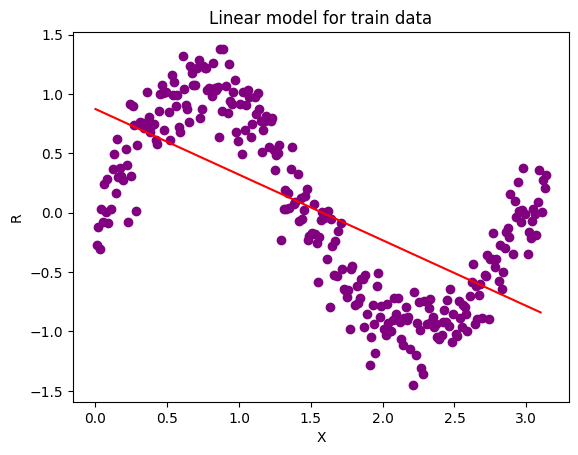

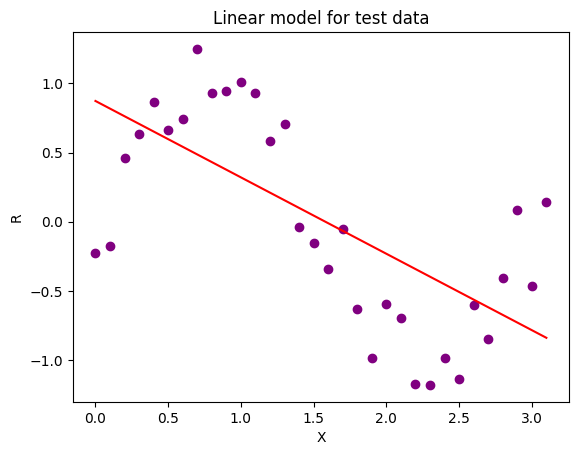

In [10]:
##Your code Here
#Plot the predicted values of y against the test_x
predictedYcolLinear = predictedYlinear.ravel() #predictedY has only one coloum with multiple rows, and x_test has one coloumn with multiple rows so 
#it will plot graph differently as given in expected, so modifying it
linearTrainGraph = plt.scatter(x_train,y_train,color='purple') #for making dots on train graph
linearTrainGraph = plt.plot(x_test,predictedYcolLinear,color='red') # for making line on train graph
plt.title("Linear model for train data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

linearTestGraph = plt.scatter(x_test,y_test,color='purple') # for making dots on test graph
linearTestGraph = plt.plot(x_test,predictedYcolLinear,color='red')# for making line on test graph
plt.title("Linear model for test data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

### Expected Outputs for Linear Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O%20test.png?raw=true)


## Now Fit The Quadratic Model

 As our Quadratic Model was
 
![Cost Funtion for quadratic ](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

And using derivatives we transformed our model into 3 simultaneous equations

![Model Equations of quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model1.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [11]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

xi3 = np.dot((x_train**2),x_train)
xi4 = np.dot((x_train**3),x_train)

quadraticA = np.array([[m,xi,xi2], #initializing A matrix
                      [xi,xi2,xi3],
                      [xi2,xi3,xi4]])

xi2yi = np.dot(x_train**2,y_train) #initializing B matrix
quadraticB = np.array([[yi],
                       [xiyi],
                       [xi2yi]])

print(f"Matrix A :\n {quadraticA}")
print(f"Matrix B :\n{quadraticB}")




Matrix A :
 [[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]
Matrix B :
[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


Expected Output

![Quadratic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad1.png?raw=true)

#### Compute Valus Of Three Θ`s


In [12]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 and 0_2
quadraticX = np.linalg.inv(quadraticA).dot(quadraticB)
print(f"Matrix X for the quadratic model : \n {quadraticX}")


Matrix X for the quadratic model : 
 [[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


Expected Output

![Quadratic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad.png?raw=true)


### Run Predictions (Testing data)

In [13]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y
xRowsTestQuadratic = x_test.reshape((len(x_test),1)) # interchanging rows to coloum and vice versa, the x_test for posible multiplication
predictedYquadratic = quadraticX[0,0] + (quadraticX[1,0]*xRowsTestQuadratic)+(quadraticX[2,0]*(xRowsTestQuadratic)**2)
print(f"Predicted Y \n {predictedYquadratic}")



Predicted Y 
 [[ 1.10611454]
 [ 1.0079184 ]
 [ 0.91254317]
 [ 0.81998887]
 [ 0.73025548]
 [ 0.643343  ]
 [ 0.55925145]
 [ 0.47798081]
 [ 0.39953109]
 [ 0.32390228]
 [ 0.25109439]
 [ 0.18110742]
 [ 0.11394137]
 [ 0.04959623]
 [-0.01192799]
 [-0.0706313 ]
 [-0.12651368]
 [-0.17957515]
 [-0.22981571]
 [-0.27723534]
 [-0.32183406]
 [-0.36361187]
 [-0.40256875]
 [-0.43870472]
 [-0.47201977]
 [-0.50251391]
 [-0.53018713]
 [-0.55503943]
 [-0.57707081]
 [-0.59628128]
 [-0.61267083]
 [-0.62623946]]


### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

In [14]:
#Your code Here
#Using cost function calculate the cost of the model
YRowsTestquadratic = y_test.reshape((len(y_test),1)) # converting y_test into 2D array,interchanging coloumns into rows, for possible subtraction from predictedY
quadraticMSE = (sum((predictedYquadratic-YRowsTestquadratic)**2)/(len(x_test))) # as two 2D arrays are being subtracted,s then squared, and then we take sum, we get 1d array having 1 element at 0th index
print(f"Mean Square Error for QUADRATIC MODEL is :: {float(quadraticMSE[0])}") 




Mean Square Error for QUADRATIC MODEL is :: 0.3260417959496286


Expected Output

![MSE of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Quad.png?raw=true
)

### Plot Data (Train and Test Data)

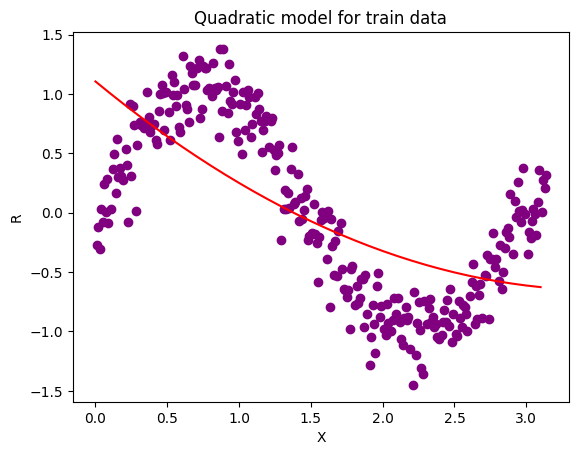

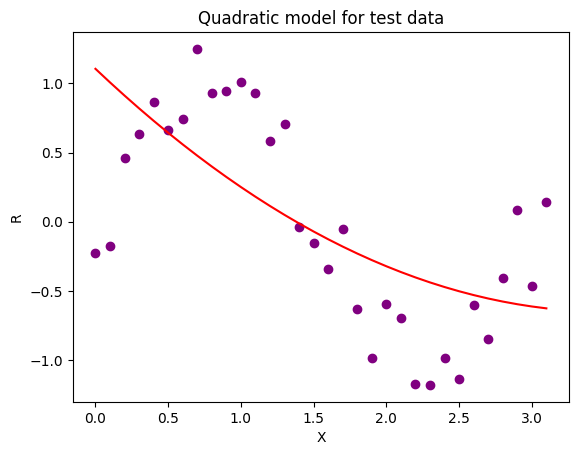

In [15]:
##Your code Here
#Plot the predicted values of y against the test_x

predictedYcolquadratic = predictedYquadratic.ravel() #predictedY has only one coloum with multiple rows, and x_test has one coloumn with multiple rows so 
#it will plot graph differently as given in expected, so modifying it
quadraticTrainGraph = plt.scatter(x_train,y_train,color='purple')
quadraticTrainGraph = plt.plot(x_test,predictedYcolquadratic,color='red')
plt.title("Quadratic model for train data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

quadraticTestGraph = plt.scatter(x_test,y_test,color='purple')
quadraticTestGraph = plt.plot(x_test,predictedYcolquadratic,color='red')
plt.title("Quadratic model for test data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()


### Expected Outputs for Quadratic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O%20tets.png?raw=true)


## Now Fit The Cubic Model

Cubic Model in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [16]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

# as i have already calculated m,xi,xi2,xi3,xi4 above

xi5 = np.dot(x_train**4,x_train)
xi6 = np.dot(x_train**5,x_train)

cubicA = np.array([[m,xi,xi2,xi3],
                  [xi,xi2,xi3,xi4],
                  [xi2,xi3,xi4,xi5],
                  [xi3,xi4,xi5,xi6]])

xi3yi = np.dot(x_train**3,y_train)

cubicB = np.array([[yi],
                  [xiyi],
                  [xi2yi],
                  [xi3yi]])

print(f"Matrix A :\n{cubicA}")
print(f"Matrix B :\n{cubicB}")








Matrix A :
[[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]
Matrix B :
[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


Expected Output

![Cubic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic1.png?raw=true)

#### Compute Valus Of Four Θ`s


In [17]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 ,0_2 and 0_3

cubicX = np.linalg.inv(cubicA).dot(cubicB)
print(f"Matrix X for the cubic model : \n {cubicX}")






Matrix X for the cubic model : 
 [[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


Expected Output

![Cubic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic.png?raw=true)


### Run Predictions (Testing data)

In [18]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x + 0_2 * x^2 + 0_3*x^3
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

xRowsTestCubic = x_test.reshape((len(x_test),1)) # interchanging rows to coloum and vice versa, the x_test for posible multiplication
predictedYcubic = cubicX[0,0] + (cubicX[1,0]*xRowsTestCubic)+(cubicX[2,0]*(xRowsTestCubic)**2)+(cubicX[3,0]*(xRowsTestCubic)**3)
print(f"Predicted Y \n {predictedYcubic}")



Predicted Y 
 [[-0.18862637]
 [ 0.16845208]
 [ 0.45487027]
 [ 0.67561819]
 [ 0.83568579]
 [ 0.94006305]
 [ 0.99373993]
 [ 1.00170641]
 [ 0.96895245]
 [ 0.90046802]
 [ 0.80124308]
 [ 0.67626762]
 [ 0.53053159]
 [ 0.36902497]
 [ 0.19673773]
 [ 0.01865982]
 [-0.16021877]
 [-0.33490808]
 [-0.50041814]
 [-0.65175898]
 [-0.78394064]
 [-0.89197314]
 [-0.97086652]
 [-1.0156308 ]
 [-1.02127602]
 [-0.98281221]
 [-0.89524941]
 [-0.75359763]
 [-0.55286692]
 [-0.2880673 ]
 [ 0.04579119]
 [ 0.45369852]]


### Mean Square Error

In [19]:
#Your code Here
#Using cost function calculate the cost of the model
YRowsTestCubic = y_test.reshape((len(y_test),1)) # converting y_test into 2D array,interchanging coloumns into rows, for possible subtraction from predictedY
cubicMSE = (sum((predictedYcubic-YRowsTestCubic)**2)/(len(x_test))) # as two 2D arrays are being subtracted,s then squared, and then we take sum, we get 1d array having 1 element at 0th index
print(f"Mean Square Error for CUBIC MODEL is :: {float(cubicMSE[0])}") 

Mean Square Error for CUBIC MODEL is :: 0.0515420576909533


Expected Output

![MSE of Cubic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Cubic.png?raw=true
)

### Plot Data (Train and Test Data)

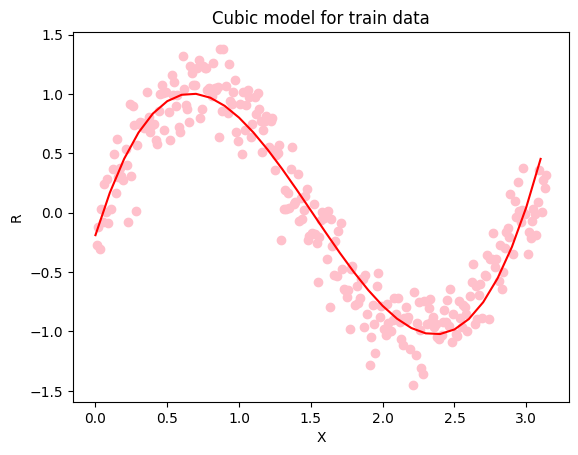

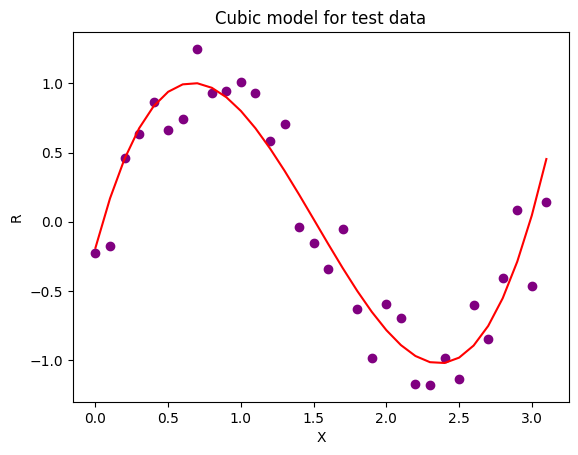

In [20]:
##Your code Here
#Plot the predicted values of y against the test_x
predictedYcolCubic = predictedYcubic.ravel() #predictedY has only one coloum with multiple rows, and x_test has one coloumn with multiple rows so 
#it will plot graph differently as given in expected, so modifying it
cubicTrainGraph = plt.scatter(x_train,y_train,color='pink')
cubicTrainGraph = plt.plot(x_test,predictedYcolCubic,color='red')
plt.title("Cubic model for train data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

cubicTestGraph = plt.scatter(x_test,y_test,color='purple')
cubicTestGraph = plt.plot(x_test,predictedYcolCubic,color='red')
plt.title("Cubic model for test data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()



### Expected Outputs for Cubic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O%20test.png?raw=true)


### Now You Are Required To Fit Your 4 , 5 and 6 degree Models Step By Step As You Did Before

## Now Fit The 4 degree Model

Matrix A :
[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978102e+03
  5.53385258e+03]
 [4.44950000e+02 9.32746500e+02 2.19978102e+03 5.53385258e+03
  1.45013383e+04]
 [9.32746500e+02 2.19978102e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04]
 [2.19978102e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05]]
Matrix B :
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]
Matrix X for the quartic model : 
 [[-0.40789474]
 [ 5.3320982 ]
 [-5.77179206]
 [ 1.81519401]
 [-0.15632916]]
Predicted Y 
 [[-0.40789474]
 [ 0.06939672]
 [ 0.44192464]
 [ 0.7200174 ]
 [ 0.9136282 ]
 [ 1.03233502]
 [ 1.08534068]
 [ 1.0814728 ]
 [ 1.02918381]
 [ 0.93655094]
 [ 0.81127625]
 [ 0.66068659]
 [ 0.49173364]
 [ 0.31099387]
 [ 0.12466857]
 [-0.06141615]
 [-0.2418094 ]
 [-0.41143544]
 [-0.56559375]
 [-0.69995899]
 [-0.81058102]
 [-0.89388486]
 [-0.94667076]
 [-0.966114

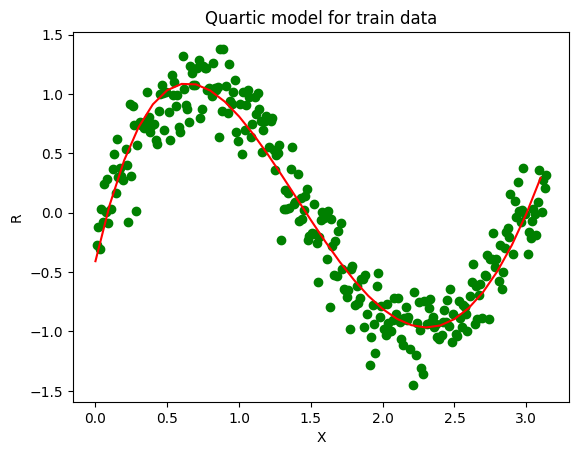

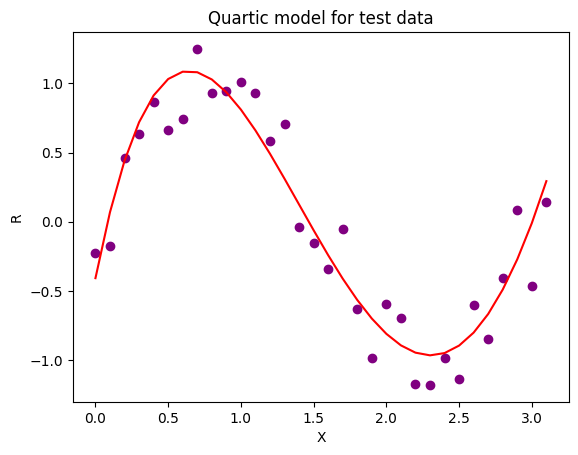

In [21]:
#Your code Here
#Quartic Model

xi7 = np.dot(x_train**6,x_train)
xi8 = np.dot(x_train**7,x_train) 

quarticA = np.array([[m,xi,xi2,xi3,xi4],
                  [xi,xi2,xi3,xi4,xi5],
                  [xi2,xi3,xi4,xi5,xi6],
                  [xi3,xi4,xi5,xi6,xi7],
                  [xi4,xi5,xi6,xi7,xi8]])

xi4yi = np.dot(x_train**4,y_train)

quarticB = np.array([[yi],
                    [xiyi],
                    [xi2yi],
                    [xi3yi],
                    [xi4yi]])
#Matrix A and B
print(f"Matrix A :\n{quarticA}")
print(f"Matrix B :\n{quarticB}")
#Matrix X ie A^-1 * B
quarticX = np.linalg.inv(quarticA).dot(quarticB)
print(f"Matrix X for the quartic model : \n {quarticX}")
#Calculating Predicted y from test data ax^4+bx^3+cx^2+dx+e
xRowsTestQuartic = x_test.reshape((len(x_test),1)) # interchanging rows to coloum and vice versa, the x_test for posible multiplication
predictedYquartic = quarticX[0,0] + (quarticX[1,0]*xRowsTestQuartic)+(quarticX[2,0]*(xRowsTestQuartic)**2)+(quarticX[3,0]*(xRowsTestQuartic)**3)+(quarticX[4,0]*(xRowsTestQuartic)**4)

print(f"Predicted Y \n {predictedYquartic}")
#Using cost function calculate the cost of the model
YRowsTestQuartic = y_test.reshape((len(y_test),1)) # converting y_test into 2D array,interchanging coloumns into rows, for possible subtraction from predictedY
quarticMSE = (sum((predictedYquartic-YRowsTestQuartic)**2)/(len(x_test))) # as two 2D arrays are being subtracted,s then squared, and then we take sum, we get 1d array having 1 element at 0th index
print(f"Mean Square Error for QUARTIC MODEL is :: {float(quarticMSE[0])}")
#Plot the predicted values of y against the test_x
predictedYcolQuartic = predictedYquartic.ravel() #predictedY has only one coloum with multiple rows, and x_test has one coloumn with multiple rows so 
#it will plot graph differently as given in expected, so modifying it
quarticTrainGraph = plt.scatter(x_train,y_train,color='green')
quarticTrainGraph = plt.plot(x_test,predictedYcolQuartic,color='red')
plt.title("Quartic model for train data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

quarticTestGraph = plt.scatter(x_test,y_test,color='purple')
quarticTestGraph = plt.plot(x_test,predictedYcolQuartic,color='red')
plt.title("Quartic model for test data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

## Now Fit The 5 degree Model

Matrix A :
[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978102e+03
  5.53385258e+03 1.45013383e+04]
 [4.44950000e+02 9.32746500e+02 2.19978102e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04]
 [9.32746500e+02 2.19978102e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05]
 [2.19978102e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06]]
Matrix B :
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]]
Matrix X for the quintic model : 
 [[-0.15135453]
 [ 2.89713972]
 [-0.36242336]
 [-2.76674175]
 [ 1.48161173]
 [-0.20822932]]
Predicted Y 
[[-0.15135453]
 [ 0.13211454]
 [ 0.39374649]
 [ 0.62196231]
 [ 0.80823914]
 [ 0.94686034]
 [ 1.03466564]
 [ 1.07080128]
 [ 1.0564701 ]
 [ 0.99468168]
 [ 

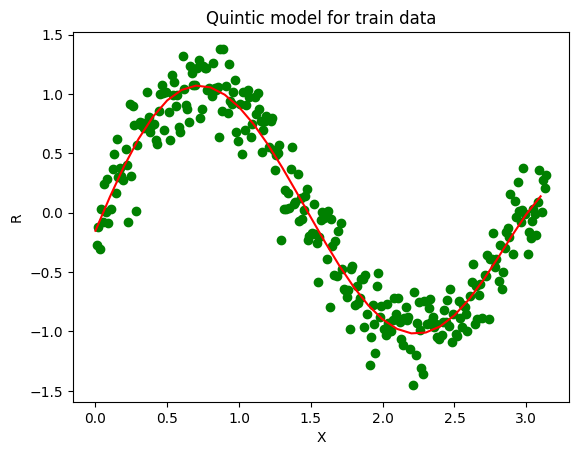

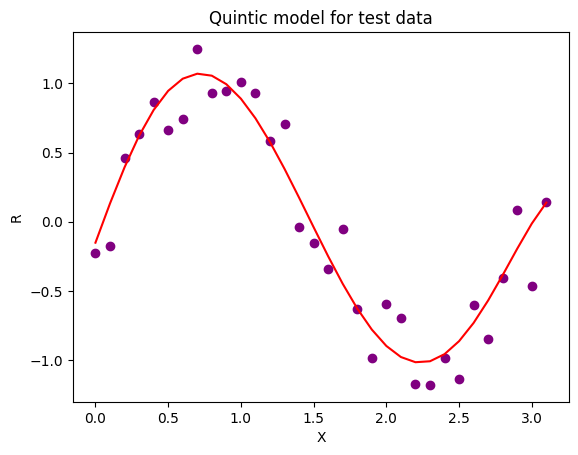

In [22]:
#Your code Here
#Quintic Model

xi9 = np.dot(x_train**8,x_train)
xi10 = np.dot(x_train**9,x_train)

quinticA = np.array([[m,xi,xi2,xi3,xi4,xi5],
                  [xi,xi2,xi3,xi4,xi5,xi6],
                  [xi2,xi3,xi4,xi5,xi6,xi7],
                  [xi3,xi4,xi5,xi6,xi7,xi8],
                  [xi4,xi5,xi6,xi7,xi8,xi9],
                  [xi5,xi6,xi7,xi8,xi9,xi10]])

xi5yi = np.dot(x_train**5,y_train)

quinticB = np.array([[yi],
                    [xiyi],
                    [xi2yi],
                    [xi3yi],
                    [xi4yi],
                    [xi5yi]])
#Matrix A and B
print(f"Matrix A :\n{quinticA}")
print(f"Matrix B :\n{quinticB}")
#Matrix X ie A^-1 * B
quinticX = np.linalg.inv(quinticA).dot(quinticB)
print(f"Matrix X for the quintic model : \n {quinticX}")
#Calculating Predicted y from test data ax^5+bx^4+cx^3+dx^2+ex+f
xRowsTestQuintic = x_test.reshape((len(x_test),1)) # interchanging rows to coloum and vice versa, the x_test for posible multiplication
predictedYquintic = quinticX[0,0] + (quinticX[1,0]*xRowsTestQuintic)+(quinticX[2,0]*(xRowsTestQuintic)**2)+(quinticX[3,0]*(xRowsTestQuintic)**3)+(quinticX[4,0]*(xRowsTestQuintic)**4)+(quinticX[5,0]*(xRowsTestQuintic)**5)
print(f"Predicted Y \n{predictedYquintic}")
#Using cost function calculate the cost of the model
YRowsTestQuintic = y_test.reshape((len(y_test),1)) # converting y_test into 2D array,interchanging coloumns into rows, for possible subtraction from predictedY
quinticMSE = (sum((predictedYquintic-YRowsTestQuintic)**2)/(len(x_test))) # as two 2D arrays are being subtracted,s then squared, and then we take sum, we get 1d array having 1 element at 0th index
print(f"Mean Square Error for QUINTIC MODEL is :: {float(quinticMSE[0])}")
#Plot the predicted values of y against the test_x
predictedYcolQuintic = predictedYquintic.ravel() #predictedY has only one coloum with multiple rows, and x_test has one coloumn with multiple rows so 
#it will plot graph differently as given in expected, so modifying it
quinticTrainGraph = plt.scatter(x_train,y_train,color='green')
quinticTrainGraph = plt.plot(x_test,predictedYcolQuintic,color='red')
plt.title("Quintic model for train data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

quinticTestGraph = plt.scatter(x_test,y_test,color='purple')
quinticTestGraph = plt.plot(x_test,predictedYcolQuintic,color='red')
plt.title("Quintic model for test data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

## Now Fit The 6 degree Model

Matrix A :
[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978102e+03
  5.53385258e+03 1.45013383e+04 3.90864884e+04]
 [4.44950000e+02 9.32746500e+02 2.19978102e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04 1.07548336e+05]
 [9.32746500e+02 2.19978102e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05 3.00624107e+05]
 [2.19978102e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05 8.50829605e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05 2.43237118e+06]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06 7.01172536e+06]
 [3.90864884e+04 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06 7.01172536e+06 2.03540142e+07]]
Matrix B :
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]
 [-1.35290159e+04]]
Matrix X for the sextic model : 
 [[-0.12883598]
 [ 2.59932804]
 [ 0.5809

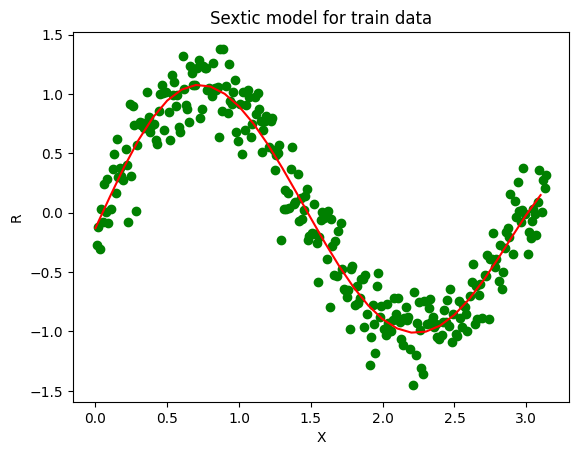

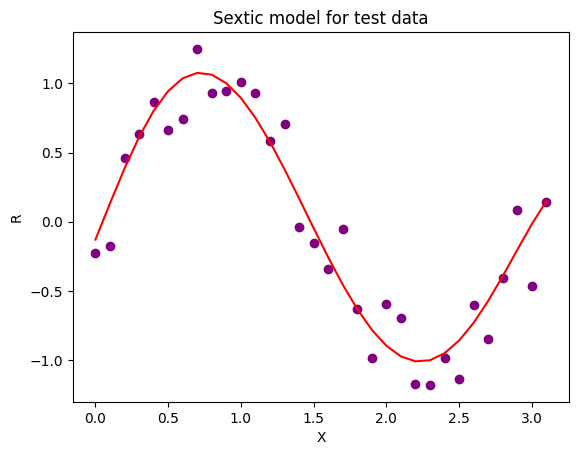

In [23]:
#Your code Here
#Sextic model

xi11 = np.dot(x_train**10,x_train)
xi12 = np.dot(x_train**11,x_train)
sexticA = np.array([[m,xi,xi2,xi3,xi4,xi5,xi6],
                  [xi,xi2,xi3,xi4,xi5,xi6,xi7],
                  [xi2,xi3,xi4,xi5,xi6,xi7,xi8],
                  [xi3,xi4,xi5,xi6,xi7,xi8,xi9],
                  [xi4,xi5,xi6,xi7,xi8,xi9,xi10],
                  [xi5,xi6,xi7,xi8,xi9,xi10,xi11],
                  [xi6,xi7,xi8,xi9,xi10,xi11,xi12]])

xi6yi = np.dot(x_train**6,y_train)
sexticB = np.array([[yi],
                    [xiyi],
                    [xi2yi],
                    [xi3yi],
                    [xi4yi],
                    [xi5yi],
                    [xi6yi]])
#Matrix A and B
print(f"Matrix A :\n{sexticA}")
print(f"Matrix B :\n{sexticB}")
#Matrix X ie A^-1 * B
sexticX = np.linalg.inv(sexticA).dot(sexticB)
print(f"Matrix X for the sextic model : \n {sexticX}")
#Calculating Predicted y from test data ax^6+bx^5+cx^4+dx^3+ex^2+fx+g
xRowsTestSextic = x_test.reshape((len(x_test),1)) # interchanging rows to coloum and vice versa, the x_test for posible multiplication
predictedYsextic = sexticX[0,0] + (sexticX[1,0]*xRowsTestSextic)+(sexticX[2,0]*(xRowsTestSextic)**2)+(sexticX[3,0]*(xRowsTestSextic)**3)+(sexticX[4,0]*(xRowsTestSextic)**4)+(sexticX[5,0]*(xRowsTestSextic)**5)+(sexticX[6,0]*(xRowsTestSextic)**6)
print(f"Predicted Y \n {predictedYsextic}")
#Using cost function calculate the cost of the model
YRowsTestSextic = y_test.reshape((len(y_test),1)) # converting y_test into 2D array,interchanging coloumns into rows, for possible subtraction from predictedY
sexticMSE = (sum((predictedYsextic-YRowsTestSextic)**2)/(len(x_test))) # as two 2D arrays are being subtracted,s then squared, and then we take sum, we get 1d array having 1 element at 0th index
print(f"Mean Square Error for SEXTIC MODEL is :: {float(sexticMSE[0])}")
#Plot the predicted values of y against the test_x
predictedYcolSextic = predictedYsextic.ravel() #predictedY has only one coloum with multiple rows, and x_test has one coloumn with multiple rows so 
#it will plot graph differently as given in expected, so modifying it
sexticTrainGraph = plt.scatter(x_train,y_train,color='green')
sexticTrainGraph = plt.plot(x_test,predictedYcolSextic,color='red')
plt.title("Sextic model for train data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()

sexticTestGraph = plt.scatter(x_test,y_test,color='purple')
sexticTestGraph = plt.plot(x_test,predictedYcolSextic,color='red')
plt.title("Sextic model for test data")
plt.xlabel('X')
plt.ylabel('R')
plt.show()




### Comment on the results by comparing all of your models